# Lab 5: High School Students Data Mining

## Statistic Tasks

### 1) Load CSV
Load the student-mat.csv and the student-por.csv files.

In [72]:
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree, _tree
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, classification_report
from sklearn.metrics import confusion_matrix
from sklearn.naive_bayes import MultinomialNB
from sklearn.preprocessing import OneHotEncoder

In [73]:
matdf = pd.read_csv('student-mat.csv', sep=';')
pordf = pd.read_csv('student-por.csv', sep=';')

In [74]:
matdf.head()
pordf.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,4,0,11,11
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,2,9,11,11
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,6,12,13,12
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,0,14,14,14
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,0,11,13,13


#### a. Rows and Columms

In [75]:
rows = matdf.shape[0]
cols = matdf.shape[1]

print("Student Mat Rows:", rows)
print("Student Mat Cols:", cols)

Student Mat Rows: 395
Student Mat Cols: 33


In [76]:
rows = pordf.shape[0]
cols = pordf.shape[1]

print("Student Por Rows:", rows)
print("Student Por Cols:", cols)

Student Por Rows: 649
Student Por Cols: 33


There are the same amount of columns in both tables. 
Student-por has more rows than student-mat.

#### b. Numerical vs. Categorical Features

In [77]:
print("Student Mat Numeric features:")
print(matdf.select_dtypes(include=["number"]).columns.tolist())

print("\nStudent Mat Categorical features:")
print(matdf.select_dtypes(include=["object", "category"]).columns.tolist())

Student Mat Numeric features:
['age', 'Medu', 'Fedu', 'traveltime', 'studytime', 'failures', 'famrel', 'freetime', 'goout', 'Dalc', 'Walc', 'health', 'absences', 'G1', 'G2', 'G3']

Student Mat Categorical features:
['school', 'sex', 'address', 'famsize', 'Pstatus', 'Mjob', 'Fjob', 'reason', 'guardian', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery', 'higher', 'internet', 'romantic']


In [78]:
print("Student Por Numeric features:")
print(pordf.select_dtypes(include=["number"]).columns.tolist())

print("\nStudent Por Categorical features:")
print(pordf.select_dtypes(include=["object", "category"]).columns.tolist())

Student Por Numeric features:
['age', 'Medu', 'Fedu', 'traveltime', 'studytime', 'failures', 'famrel', 'freetime', 'goout', 'Dalc', 'Walc', 'health', 'absences', 'G1', 'G2', 'G3']

Student Por Categorical features:
['school', 'sex', 'address', 'famsize', 'Pstatus', 'Mjob', 'Fjob', 'reason', 'guardian', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery', 'higher', 'internet', 'romantic']


#### c. Explanation

Both student-mat and student-por have the same numerical and categorical attributes. The numerical attributes are the attributes that contain numerical data and the categorical attributes are the attributes that contain all other types of data.

### 2) Features with the Greatest Impact on Grades

#### a. Student Mat

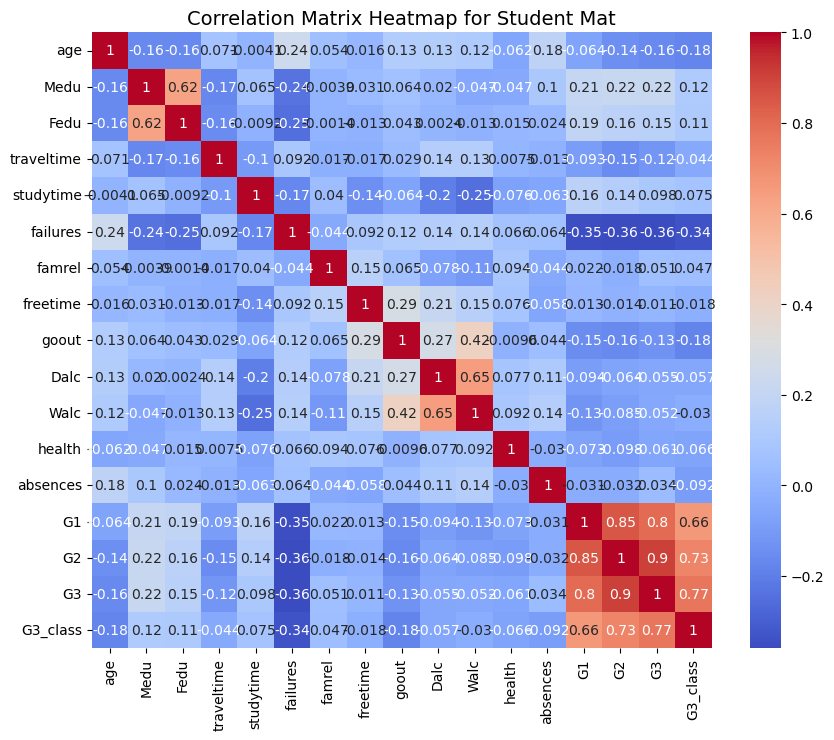

In [90]:
# get the numerical features
matdf_num = matdf.select_dtypes(include=["number"])

# plot the heatmap
plt.figure(figsize=(10,8))
sns.heatmap(matdf_num.iloc[:, :].corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Matrix Heatmap for Student Mat", fontsize=14)
plt.savefig("Correlation Matrix Heatmap for Student Mat")
plt.show()

The three most important features for the grades are Medu, Fedu, and Studytime. These have the highest average value for G1, G2, and G3.

#### b. Student Por

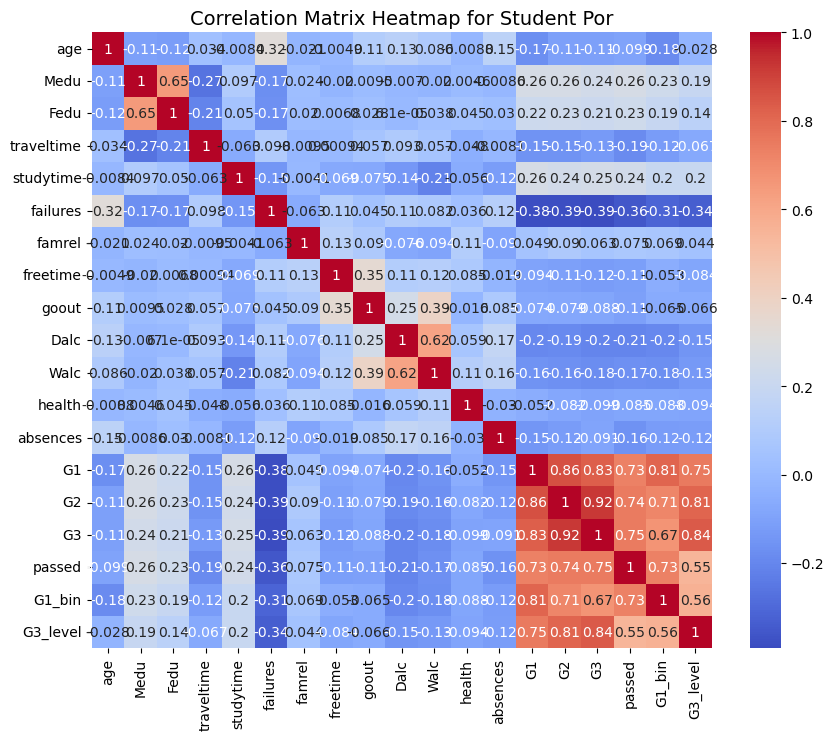

In [92]:
# get the numerical features
pordf_num = pordf.select_dtypes(include=["number"])

# plot the heatmap
plt.figure(figsize=(10,8))
sns.heatmap(pordf_num.iloc[:, :].corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Matrix Heatmap for Student Por", fontsize=14)
plt.savefig("Correlation Matrix Heatmap for Student Por")
plt.show()

The three highest values are the same as in the Student Mat dataset: Medu, Fedu, and Studytime.

### 3) Bar plots

#### a. Student Mat

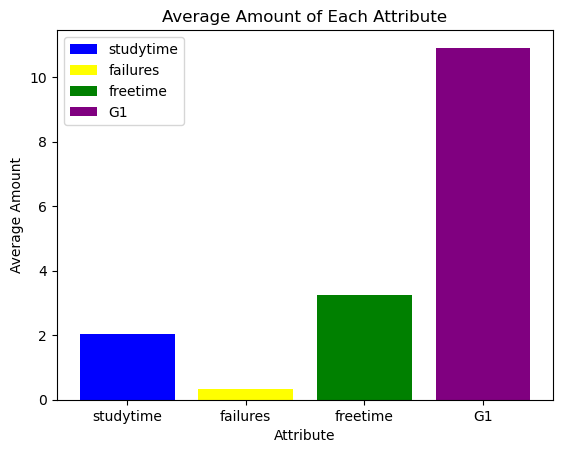

In [93]:
averages = matdf[['studytime', 'failures', 'freetime', 'G1']].mean()

plt.bar(averages.index, averages.values, color=['blue','yellow','green','purple'], label=['studytime', 'failures', 'freetime', 'G1'])

plt.title('Average Amount of Each Attribute')
plt.xlabel('Attribute')
plt.ylabel('Average Amount')
plt.legend()
plt.savefig("BarPlotMat.jpg")
plt.show()

This Plot shows the average values of four attributes from the student-mat data set.  From this table we can see that on average students have high grades and low failures. We can also see that their freetime and studytime is pretty balanced with freetime being slightly higher.

#### b. Student Por

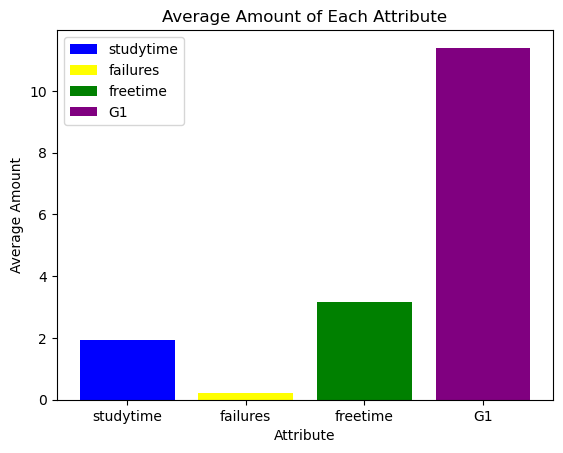

In [94]:
averages = pordf[['studytime', 'failures', 'freetime', 'G1']].mean()

plt.bar(averages.index, averages.values, color=['blue','yellow','green','purple'], label=['studytime', 'failures', 'freetime', 'G1'])

plt.title('Average Amount of Each Attribute')
plt.xlabel('Attribute')
plt.ylabel('Average Amount')
plt.legend()
plt.savefig("BarPlotPor.jpg")
plt.show()

We see very similar results compared to the student-mat dataset.

### 4) Line Plots

#### a. Student Mat

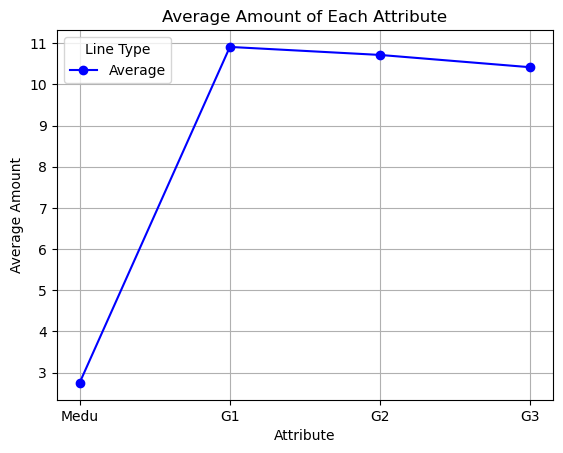

In [95]:
# Compute averages
averages = matdf[['Medu', 'G1', 'G2', 'G3']].mean()

# Plot a line instead of bars
plt.plot(averages.index, averages.values, 
         marker='o', linestyle='-', color='b', label='Average')

plt.title('Average Amount of Each Attribute')
plt.xlabel('Attribute')
plt.ylabel('Average Amount')

plt.legend(title='Line Type')
plt.grid(True)
plt.savefig("LinePlotMat.jpg")
plt.show()

With this graph we can see that on average the G1 score is the highest with a slight decline over to G3. We can also see that the Medu value is about expected as that represents around highschool.

#### b. Student Por

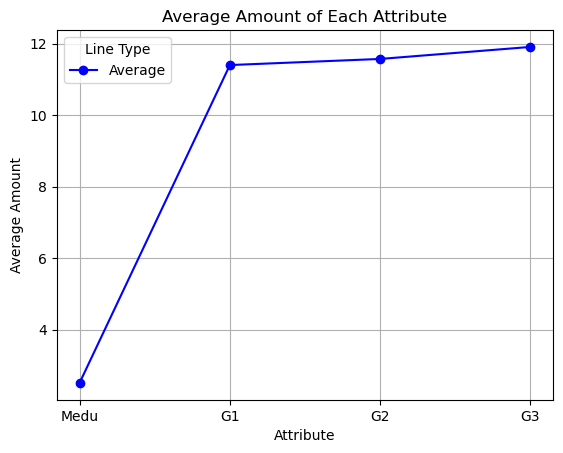

In [96]:
# Compute averages
averages = pordf[['Medu', 'G1', 'G2', 'G3']].mean()

# Plot a line instead of bars
plt.plot(averages.index, averages.values, 
         marker='o', linestyle='-', color='b', label='Average')

plt.title('Average Amount of Each Attribute')
plt.xlabel('Attribute')
plt.ylabel('Average Amount')

plt.legend(title='Line Type')
plt.grid(True)
plt.savefig("LinePlotPor.jpg")
plt.show()

We can see very similar things to the student-mat data set except for the grades are now on a slight incline from G1 to G3.

## Data Mining Questions

### 1) Decision Tree

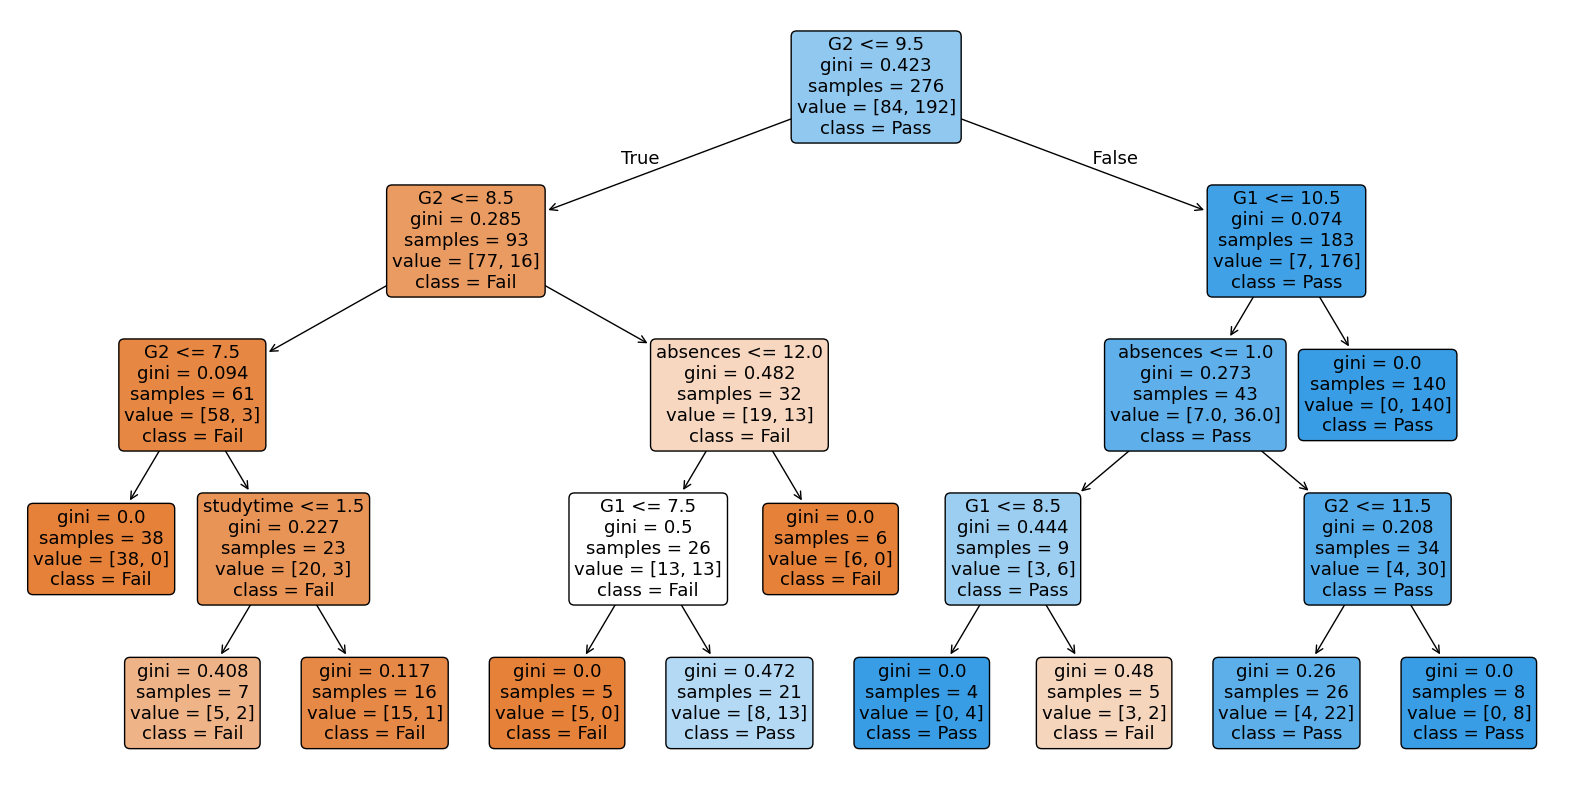

In [97]:
# create the rule
matdf['G3_class'] = (matdf['G3'] >= 10).astype(int)

# select the attributes for use and define X and y
features = ['studytime', 'failures', 'absences', 'G1', 'G2']
X = matdf[features]
y = matdf['G3_class']

# split the data into train and test data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# train the tree with max depth = 4
clf = DecisionTreeClassifier(max_depth=4, random_state=42)
clf.fit(X_train, y_train)

# plot the tree
plt.figure(figsize=(20, 10))
plot_tree(clf, feature_names=features, class_names=["Fail", "Pass"], filled=True, rounded=True)
plt.savefig("DecisionTree")
plt.show()

The biggest take away is that the students with a higher G1 or G2 value have a higher chane of passing.

### 2) Naive Bayes

In [99]:
# create passed variable
pordf["passed"] = (pordf["G3"] >= 12).astype(int)

# use this rule
pordf["G1_bin"] = (pordf["G1"] >= 12).astype(int)

# select the attributes for use and define X and y
features = ["studytime", "absences", "G1_bin"]
X = pordf[features]
y = pordf["passed"]

# split the data into train and test data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# set up Naive Bayes
nb = GaussianNB()
nb.fit(X_train, y_train)

# use naive bayes to make the predictions
y_pred = nb.predict(X_test)

# look at how accurate we were
print("\nAccuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:")
print(classification_report(y_test, y_pred))



Accuracy: 0.8512820512820513

Classification Report:
              precision    recall  f1-score   support

           0       0.81      0.88      0.84        88
           1       0.89      0.83      0.86       107

    accuracy                           0.85       195
   macro avg       0.85      0.85      0.85       195
weighted avg       0.85      0.85      0.85       195



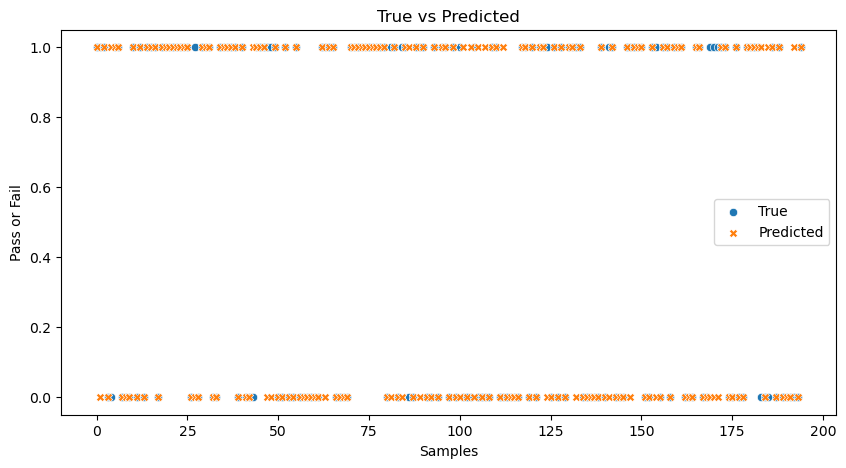

In [100]:
# scatter plot visuaization
plt.figure(figsize=(10, 5))
sns.scatterplot(x=range(len(y_test)), y=y_test, label="True")
sns.scatterplot(x=range(len(y_pred)), y=y_pred, label="Predicted", marker='X')
plt.xlabel("Samples")
plt.ylabel("Pass or Fail")
plt.title("True vs Predicted")
plt.legend()
plt.savefig("Scatter")
plt.show()

This scatter plot is representing all the fails on the bottom and all the passes at the top. The predicted labels are the orange Xs and the true labels are the blue dots. Because most of the blue dots are covered that means that our prediction was pretty good because most of the values are overlapping.

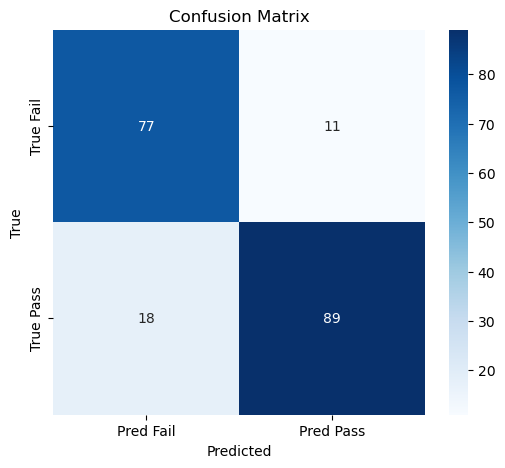

In [101]:
#confusion matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["Pred Fail", "Pred Pass"], yticklabels=["True Fail", "True Pass"])
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.savefig("Naive Bayes CM")
plt.show()

The top left to bottom right diagonal on this confusion matrix show where our predictions lined up with the true values. Becasue those squares are high in concentration it shows that our prediction went pretty well. The values in the othe squares show where the prediction was wrong. Ideally those should be as low as possible. Ours has low numbers but not that low which makes sense as we got an accuracy percentage of 85% earlier. 

### 3) Multinomial Naive Bayes

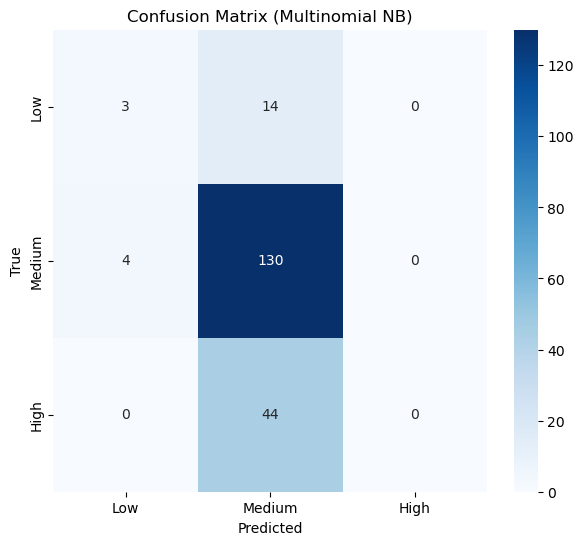

In [102]:
# grade levels
def grade_level(g):
    if g <= 8:
        return 0      # low
    elif g <= 14:
        return 1      # medium
    else:
        return 2      # high

pordf["G3_level"] = pordf["G3"].apply(grade_level)

# select the attributes for use and define X and y
features = ["studytime", "failures", "schoolsup", "famsup", "activities"]
X = pordf[features]
y = pordf["G3_level"]

# encode the categorical values
cat_features = ["schoolsup", "famsup", "activities"]
num_features = ["studytime", "failures"]

# encode categorical attributes
encoder = OneHotEncoder(drop="first", sparse_output=False)
encoded_cat = encoder.fit_transform(X[cat_features])

# create the final feature matrix
X_final = np.concatenate([X[num_features].values, encoded_cat], axis=1)

# split the data into train and test data
X_train, X_test, y_train, y_test = train_test_split(X_final, y, test_size=0.30, random_state=42)

# set up the mulitnomial naive bayes
model = MultinomialNB()
model.fit(X_train, y_train)

# make the predictions
y_pred = model.predict(X_test)

# confusion matrix 
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(7, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["Low", "Medium", "High"], yticklabels=["Low", "Medium", "High"])
plt.title("Confusion Matrix (Multinomial NB)")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.savefig("MultinomialNB CM")
plt.show()

This confusion matrix shows that it was very good at predicting medium values but not so much with predicting the low and high values. This is probably because there are a lot more test cases for the medium values based on the parameters I set up.